In [48]:
# importing variables
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import simplefilter
simplefilter('ignore')

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.neural_network import MLPRegressor
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold

In [2]:
# display the visualization in good quality of image
%matplotlib inline
%config InlineBackend.figure_formats = 'retina'

In [3]:
# # Importing the Google Drive
# from google.colab import drive
# drive.mount('/content/Drive')

In [4]:
pwd

'C:\\Users\\udayr'

In [5]:
cd Documents/

C:\Users\udayr\Documents


In [6]:
cd walmart-recruiting-store-sales-forecasting/

C:\Users\udayr\Documents\walmart-recruiting-store-sales-forecasting


In [7]:
ls

 Volume in drive C is OS
 Volume Serial Number is 64DE-021A

 Directory of C:\Users\udayr\Documents\walmart-recruiting-store-sales-forecasting

11/09/2023  02:51 PM    <DIR>          .
11/18/2023  10:00 AM    <DIR>          ..
11/09/2023  02:51 PM    <DIR>          features.csv
11/09/2023  02:51 PM    <DIR>          sampleSubmission.csv
11/09/2023  12:37 PM               532 stores.csv
11/09/2023  02:51 PM    <DIR>          test.csv
11/09/2023  02:51 PM    <DIR>          train.csv
               1 File(s)            532 bytes
               6 Dir(s)  411,203,444,736 bytes free


In [8]:
dataset = pd.read_csv(r"C:\Users\udayr\Documents\walmart-recruiting-store-sales-forecasting\train.csv\train.csv", names = ['Store','Dept','Date','Weekly_Sales','IsHoliday'], sep = ',', header=0)
features = pd.read_csv(r"C:\Users\udayr\Documents\walmart-recruiting-store-sales-forecasting\features.csv\features.csv", sep=',', header = 0, names = ['Store', 'Date','Temperature','Fuel_Price', 'MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','CPI','Unemployment','IsHoliday']).drop(columns=['IsHoliday'])

In [9]:
dataset.head()

Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  2010-02-05      24924.50      False
1      1     1  2010-02-12      46039.49       True
2      1     1  2010-02-19      41595.55      False
3      1     1  2010-02-26      19403.54      False
4      1     1  2010-03-05      21827.90      False

In [10]:
# Shape of the dataset
dataset.shape

(421570, 5)

In [11]:
# Checking the missing values for dataset table
dataset.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [12]:
features.head()

Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  2010-02-05        42.31       2.572        NaN        NaN   
1      1  2010-02-12        38.51       2.548        NaN        NaN   
2      1  2010-02-19        39.93       2.514        NaN        NaN   
3      1  2010-02-26        46.63       2.561        NaN        NaN   
4      1  2010-03-05        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  
0        NaN        NaN        NaN  211.096358         8.106  
1        NaN        NaN        NaN  211.242170         8.106  
2        NaN        NaN        NaN  211.289143         8.106  
3        NaN        NaN        NaN  211.319643         8.106  
4        NaN        NaN        NaN  211.350143         8.106

In [13]:
features.shape

(8190, 11)

In [14]:
# Checking the missing values for features table
missing_values = features.isnull().sum()
missing_values

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
dtype: int64

In [15]:
missing_values[missing_values > 0]

MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
dtype: int64

In [16]:
# total values in the dataset
total_values = np.product(features.shape)
total_values

90090

In [17]:
# total sum of the values
total_sum = missing_values.sum()
total_sum

24040

In [18]:
# total percentage of missing values
percent = (total_sum / total_values) * 100
percent

26.684426684426683

In [19]:
dataset.head()

Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  2010-02-05      24924.50      False
1      1     1  2010-02-12      46039.49       True
2      1     1  2010-02-19      41595.55      False
3      1     1  2010-02-26      19403.54      False
4      1     1  2010-03-05      21827.90      False

In [20]:
features.head()

Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  2010-02-05        42.31       2.572        NaN        NaN   
1      1  2010-02-12        38.51       2.548        NaN        NaN   
2      1  2010-02-19        39.93       2.514        NaN        NaN   
3      1  2010-02-26        46.63       2.561        NaN        NaN   
4      1  2010-03-05        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  
0        NaN        NaN        NaN  211.096358         8.106  
1        NaN        NaN        NaN  211.242170         8.106  
2        NaN        NaN        NaN  211.289143         8.106  
3        NaN        NaN        NaN  211.319643         8.106  
4        NaN        NaN        NaN  211.350143         8.106

In [21]:
dataset.dtypes

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
dtype: object

In [22]:
features.dtypes

Store             int64
Date             object
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
dtype: object

In [23]:
stores = pd.read_csv(r"C:\Users\udayr\Documents\walmart-recruiting-store-sales-forecasting\stores.csv", names = ['Store','Type','Size'], sep = ',', header=0)
stores.head()

Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875

In [24]:
stores.dtypes

Store     int64
Type     object
Size      int64
dtype: object

In [25]:
dataset = dataset.merge(stores, how='left').merge(features, how = 'left')
dataset.head()

Store  Dept        Date  Weekly_Sales  IsHoliday Type    Size  Temperature  \
0      1     1  2010-02-05      24924.50      False    A  151315        42.31   
1      1     1  2010-02-12      46039.49       True    A  151315        38.51   
2      1     1  2010-02-19      41595.55      False    A  151315        39.93   
3      1     1  2010-02-26      19403.54      False    A  151315        46.63   
4      1     1  2010-03-05      21827.90      False    A  151315        46.50   

   Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
0       2.572        NaN        NaN        NaN        NaN        NaN   
1       2.548        NaN        NaN        NaN        NaN        NaN   
2       2.514        NaN        NaN        NaN        NaN        NaN   
3       2.561        NaN        NaN        NaN        NaN        NaN   
4       2.625        NaN        NaN        NaN        NaN        NaN   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

In [26]:
dataset.shape

(421570, 16)

In [27]:
dataset.dtypes

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
Type             object
Size              int64
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
dtype: object

In [28]:
# Lets Explore the Data
def scatter(dataset, columns):
  plt.figure()
  plt.scatter(dataset[columns], dataset['Weekly_Sales'])
  plt.ylabel('Weekly Sales')
  plt.xlabel(columns)

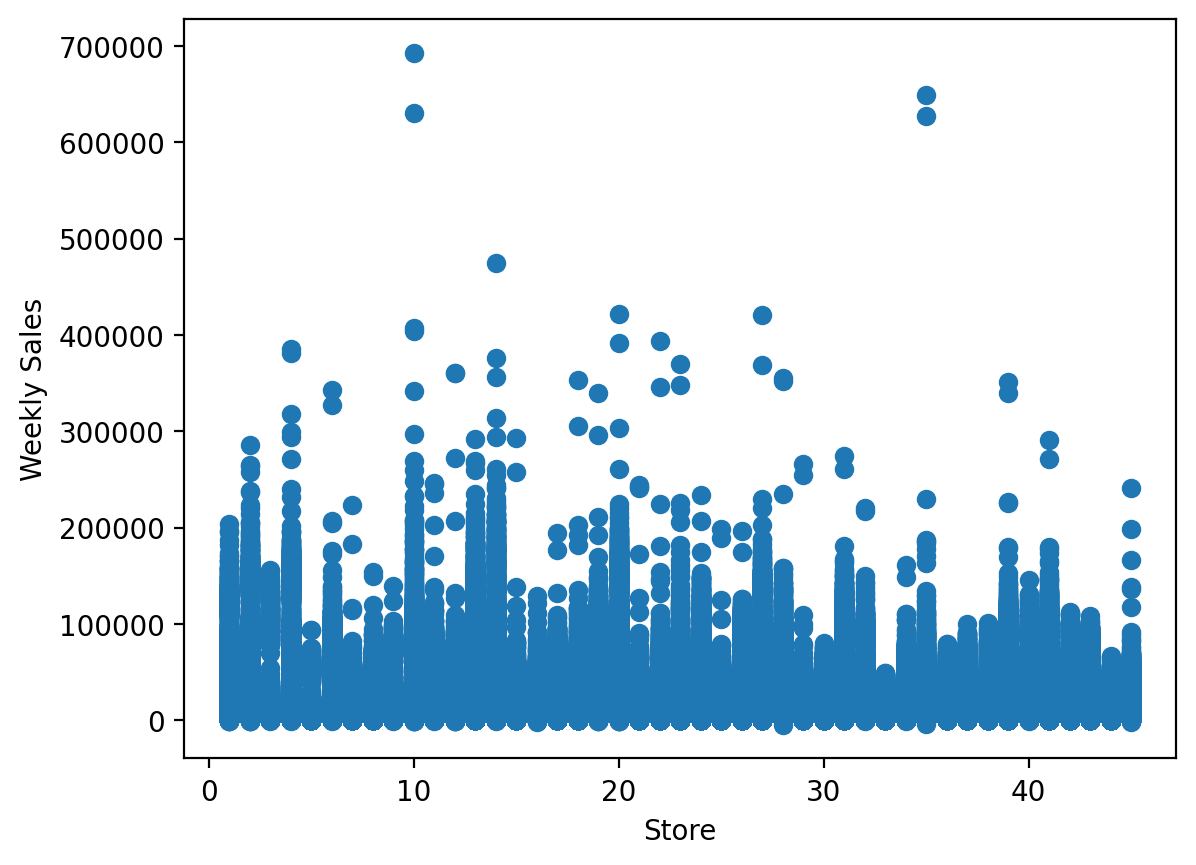

In [29]:
scatter(dataset, 'Store')

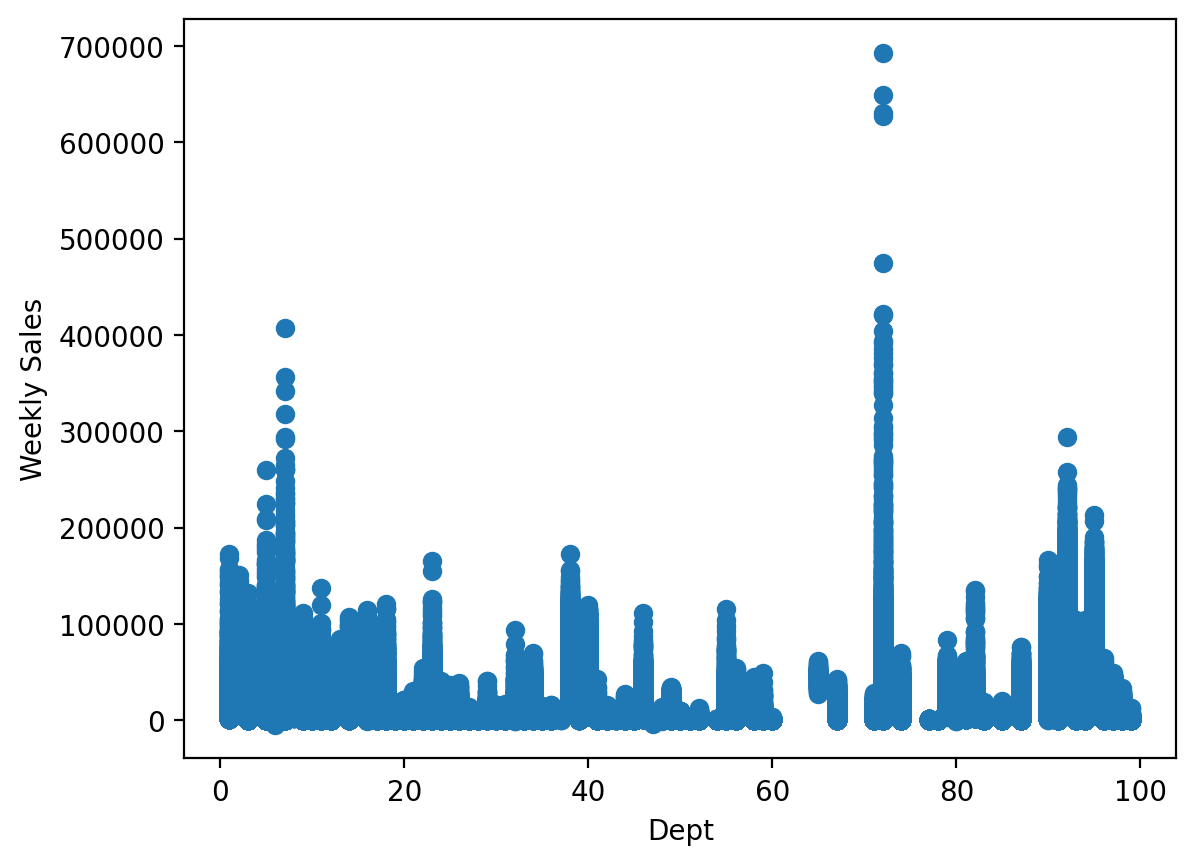

In [30]:
scatter(dataset, 'Dept')

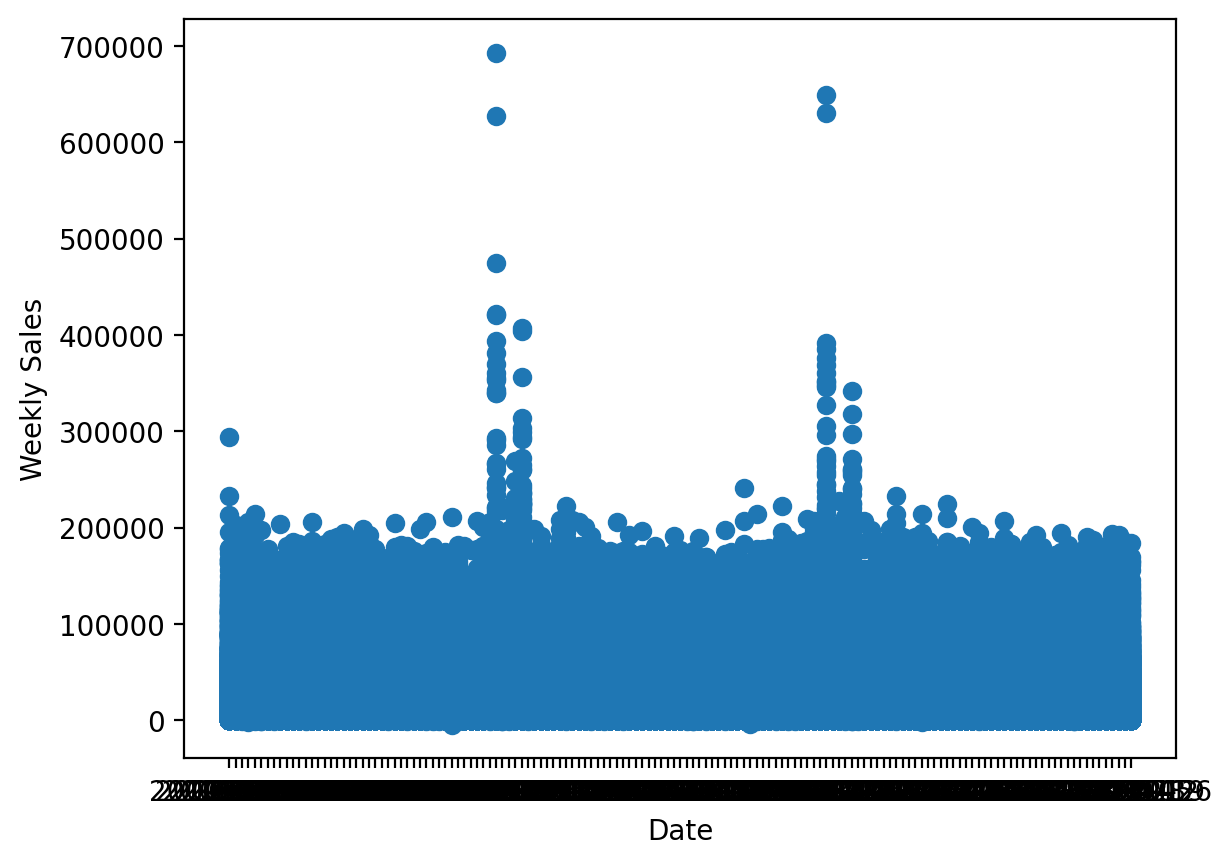

In [31]:
scatter(dataset, 'Date')

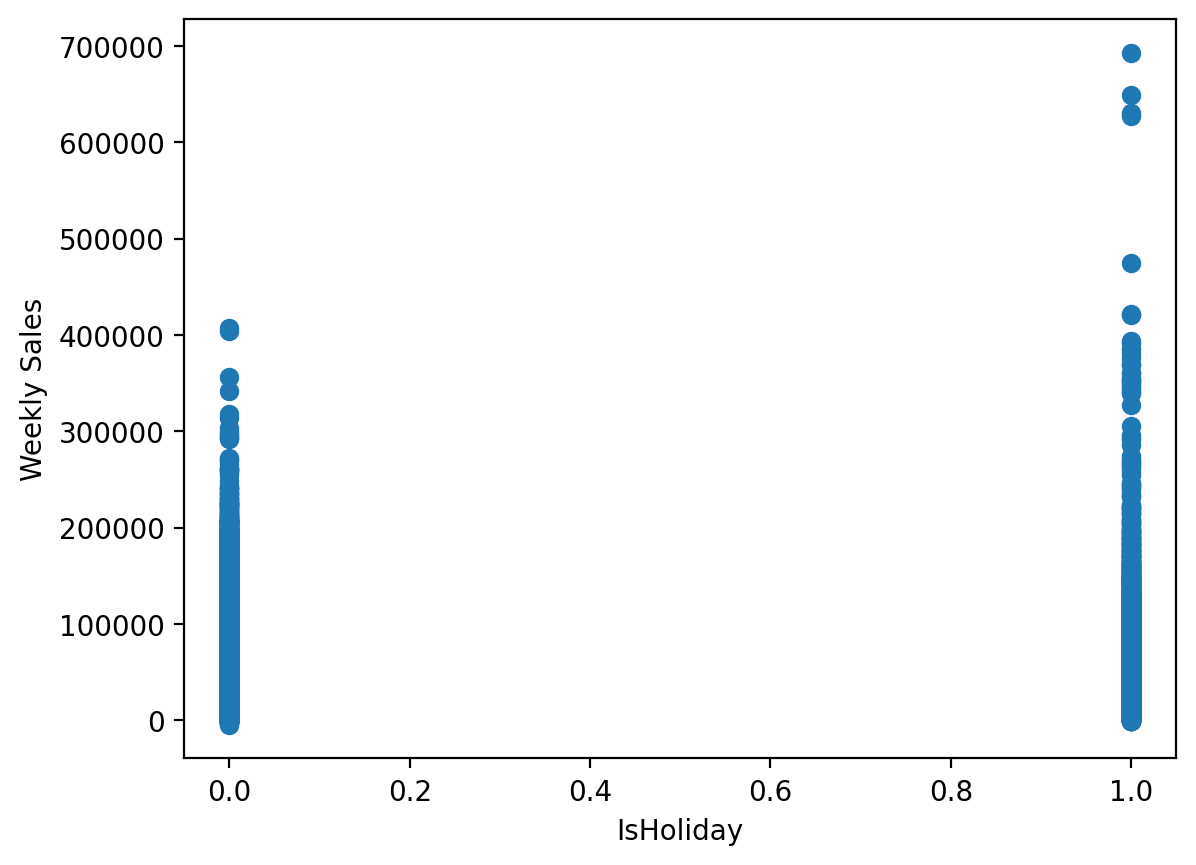

In [32]:
scatter(dataset, 'IsHoliday')

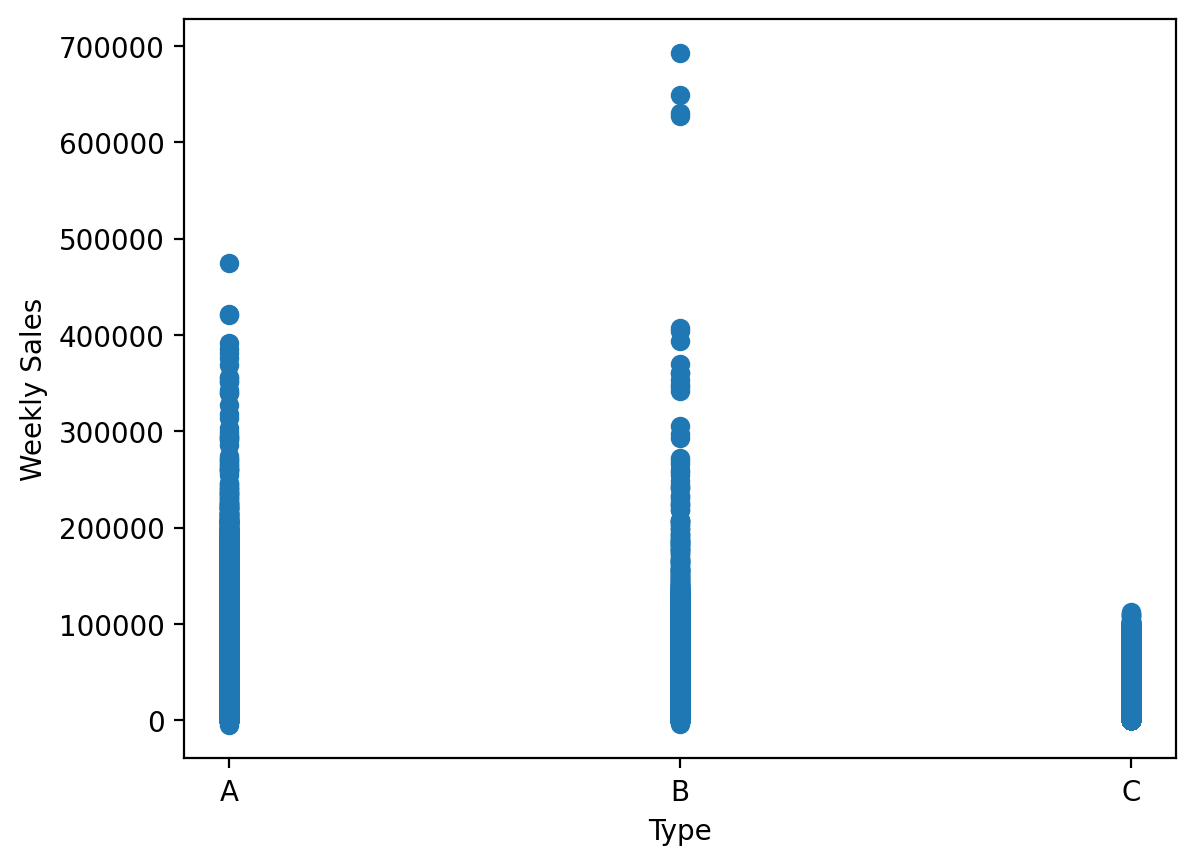

In [33]:
scatter(dataset, 'Type')

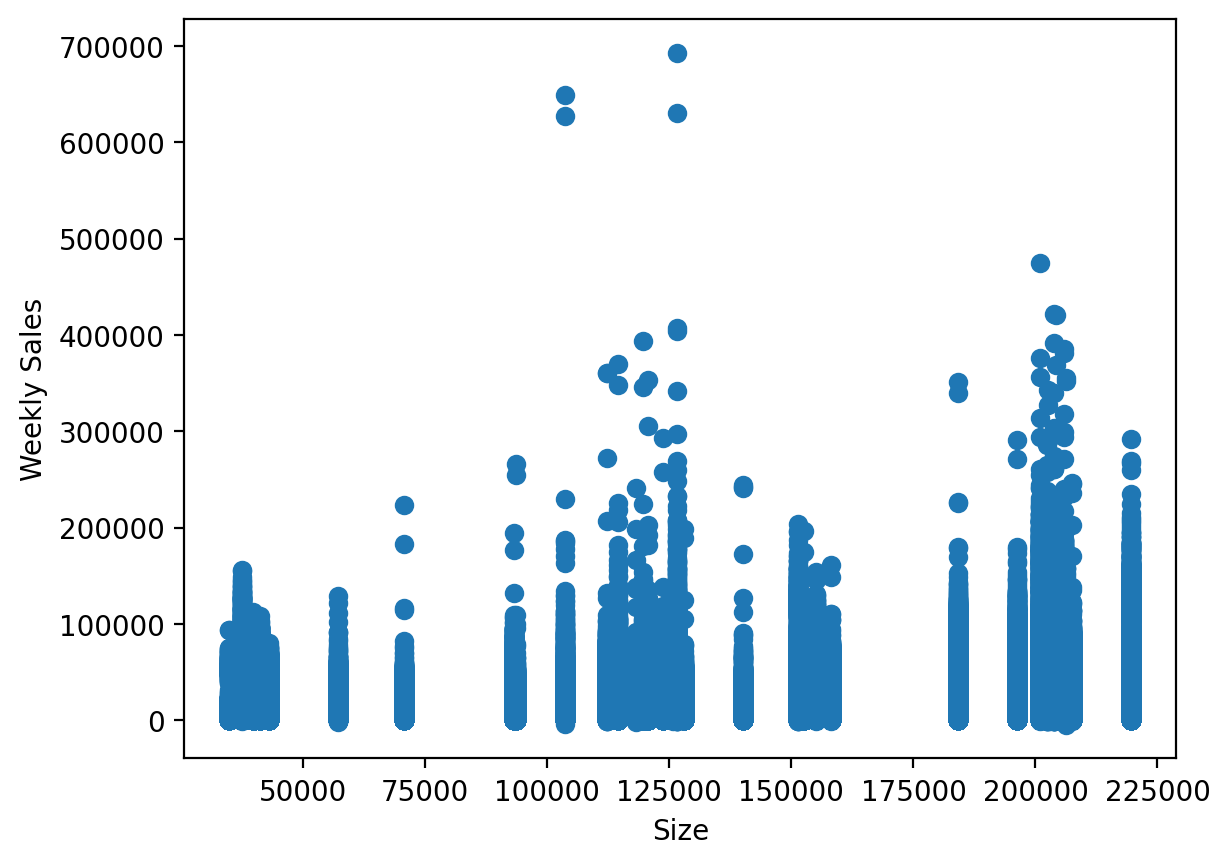

In [34]:
scatter(dataset, 'Size')

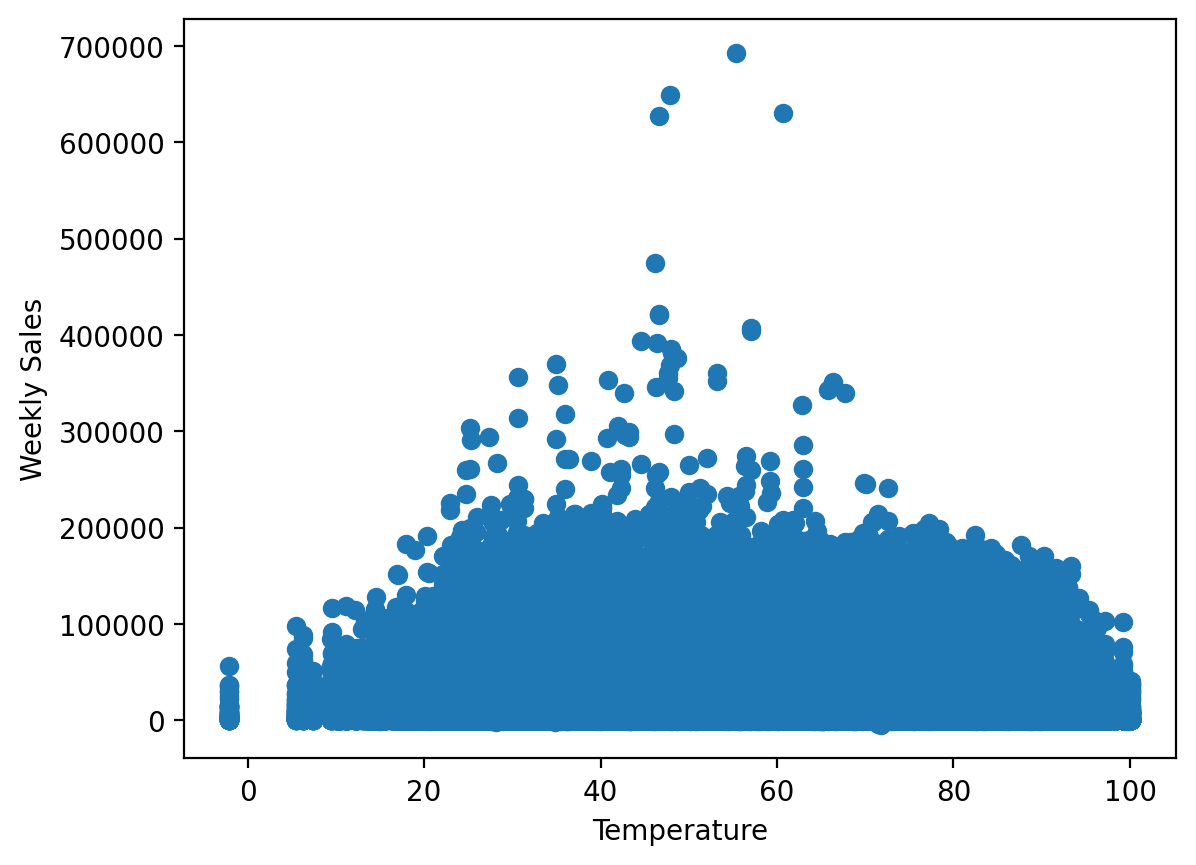

In [35]:
scatter(dataset, 'Temperature')

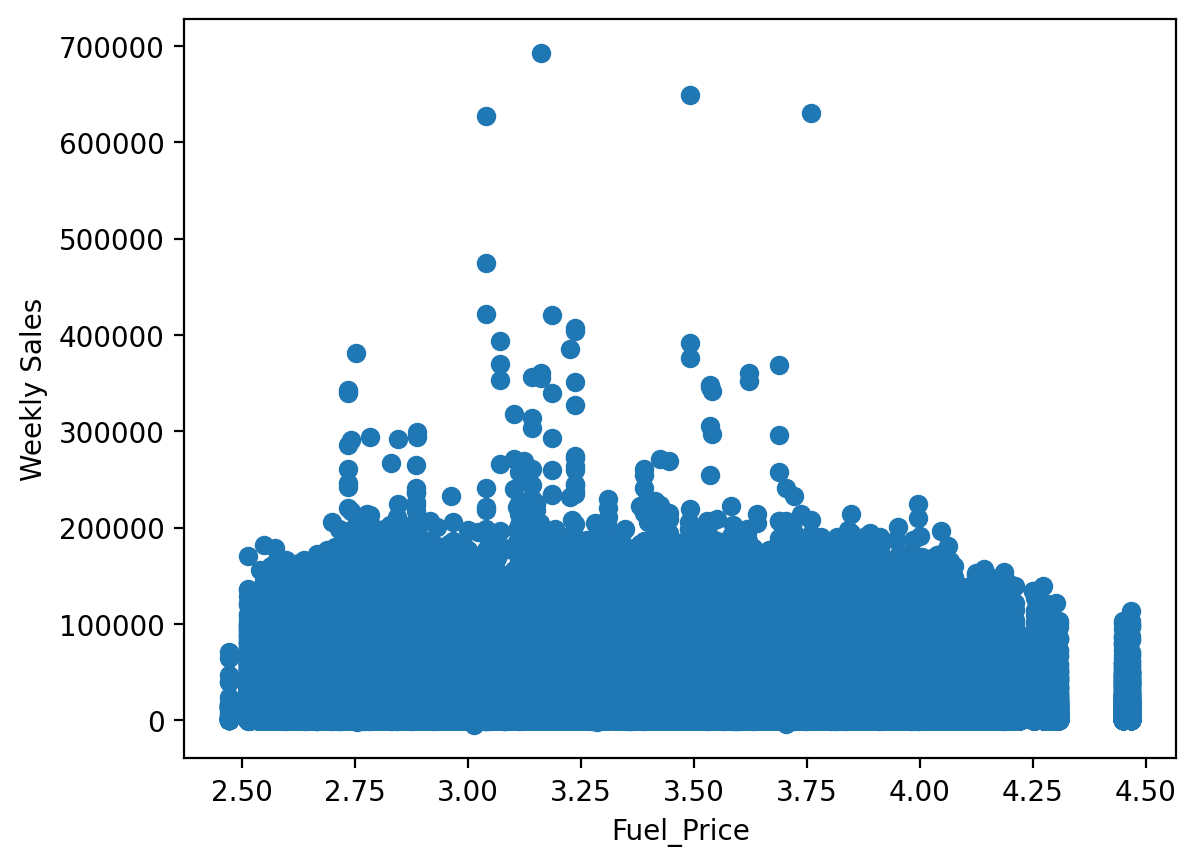

In [36]:
scatter(dataset, 'Fuel_Price')

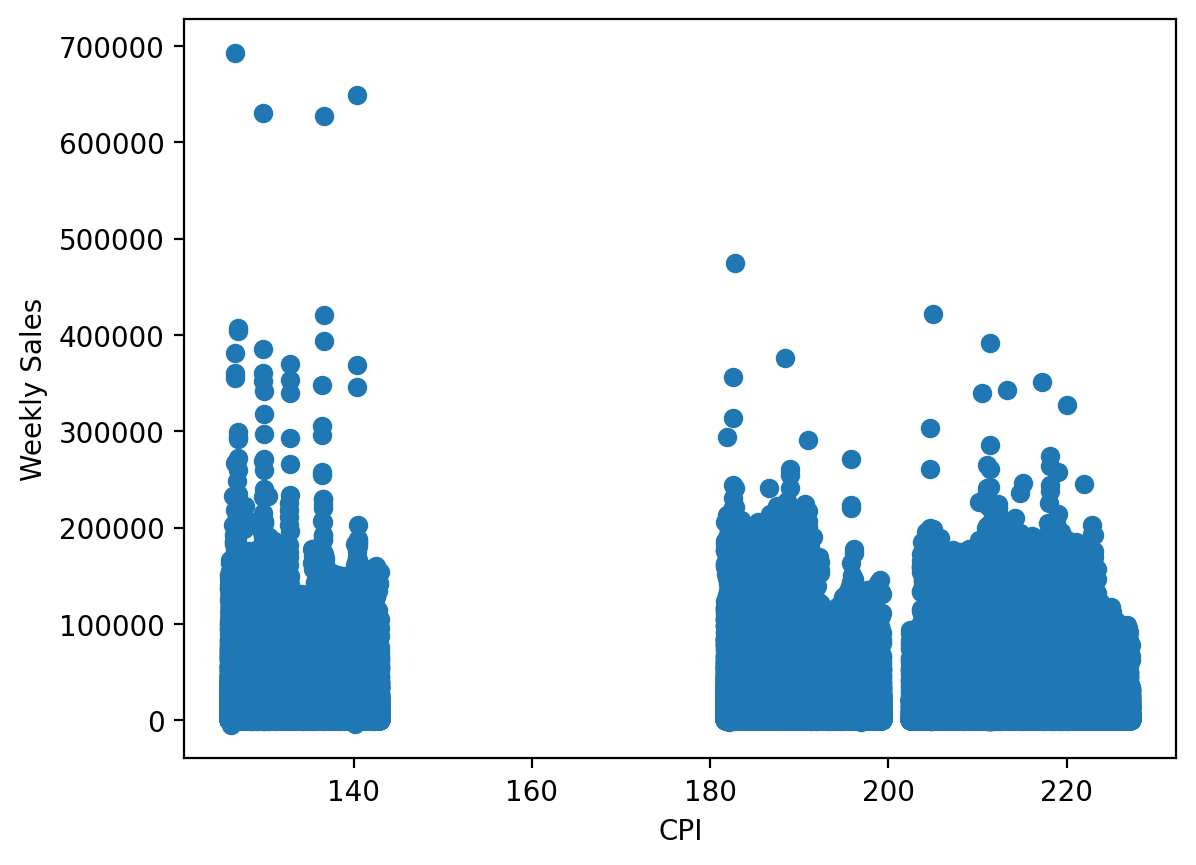

In [37]:
scatter(dataset, 'CPI')

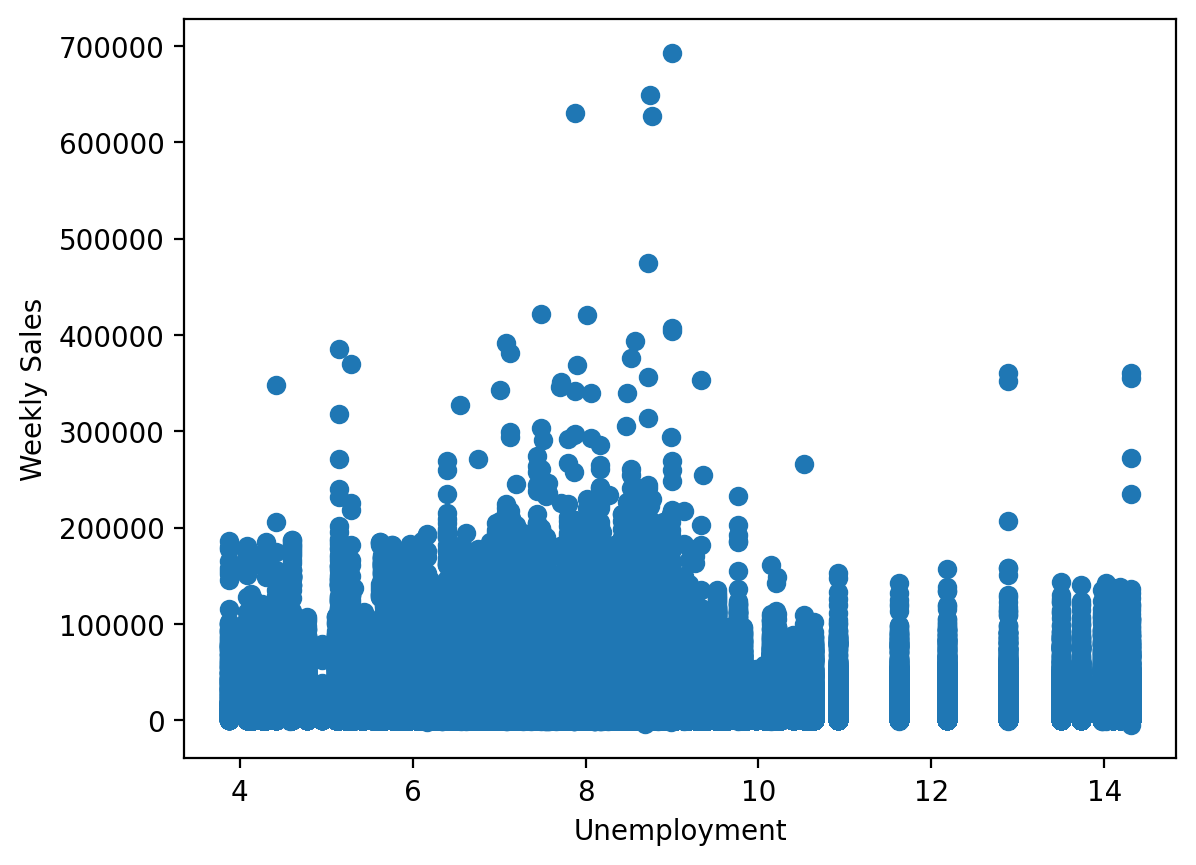

In [38]:
scatter(dataset, 'Unemployment')

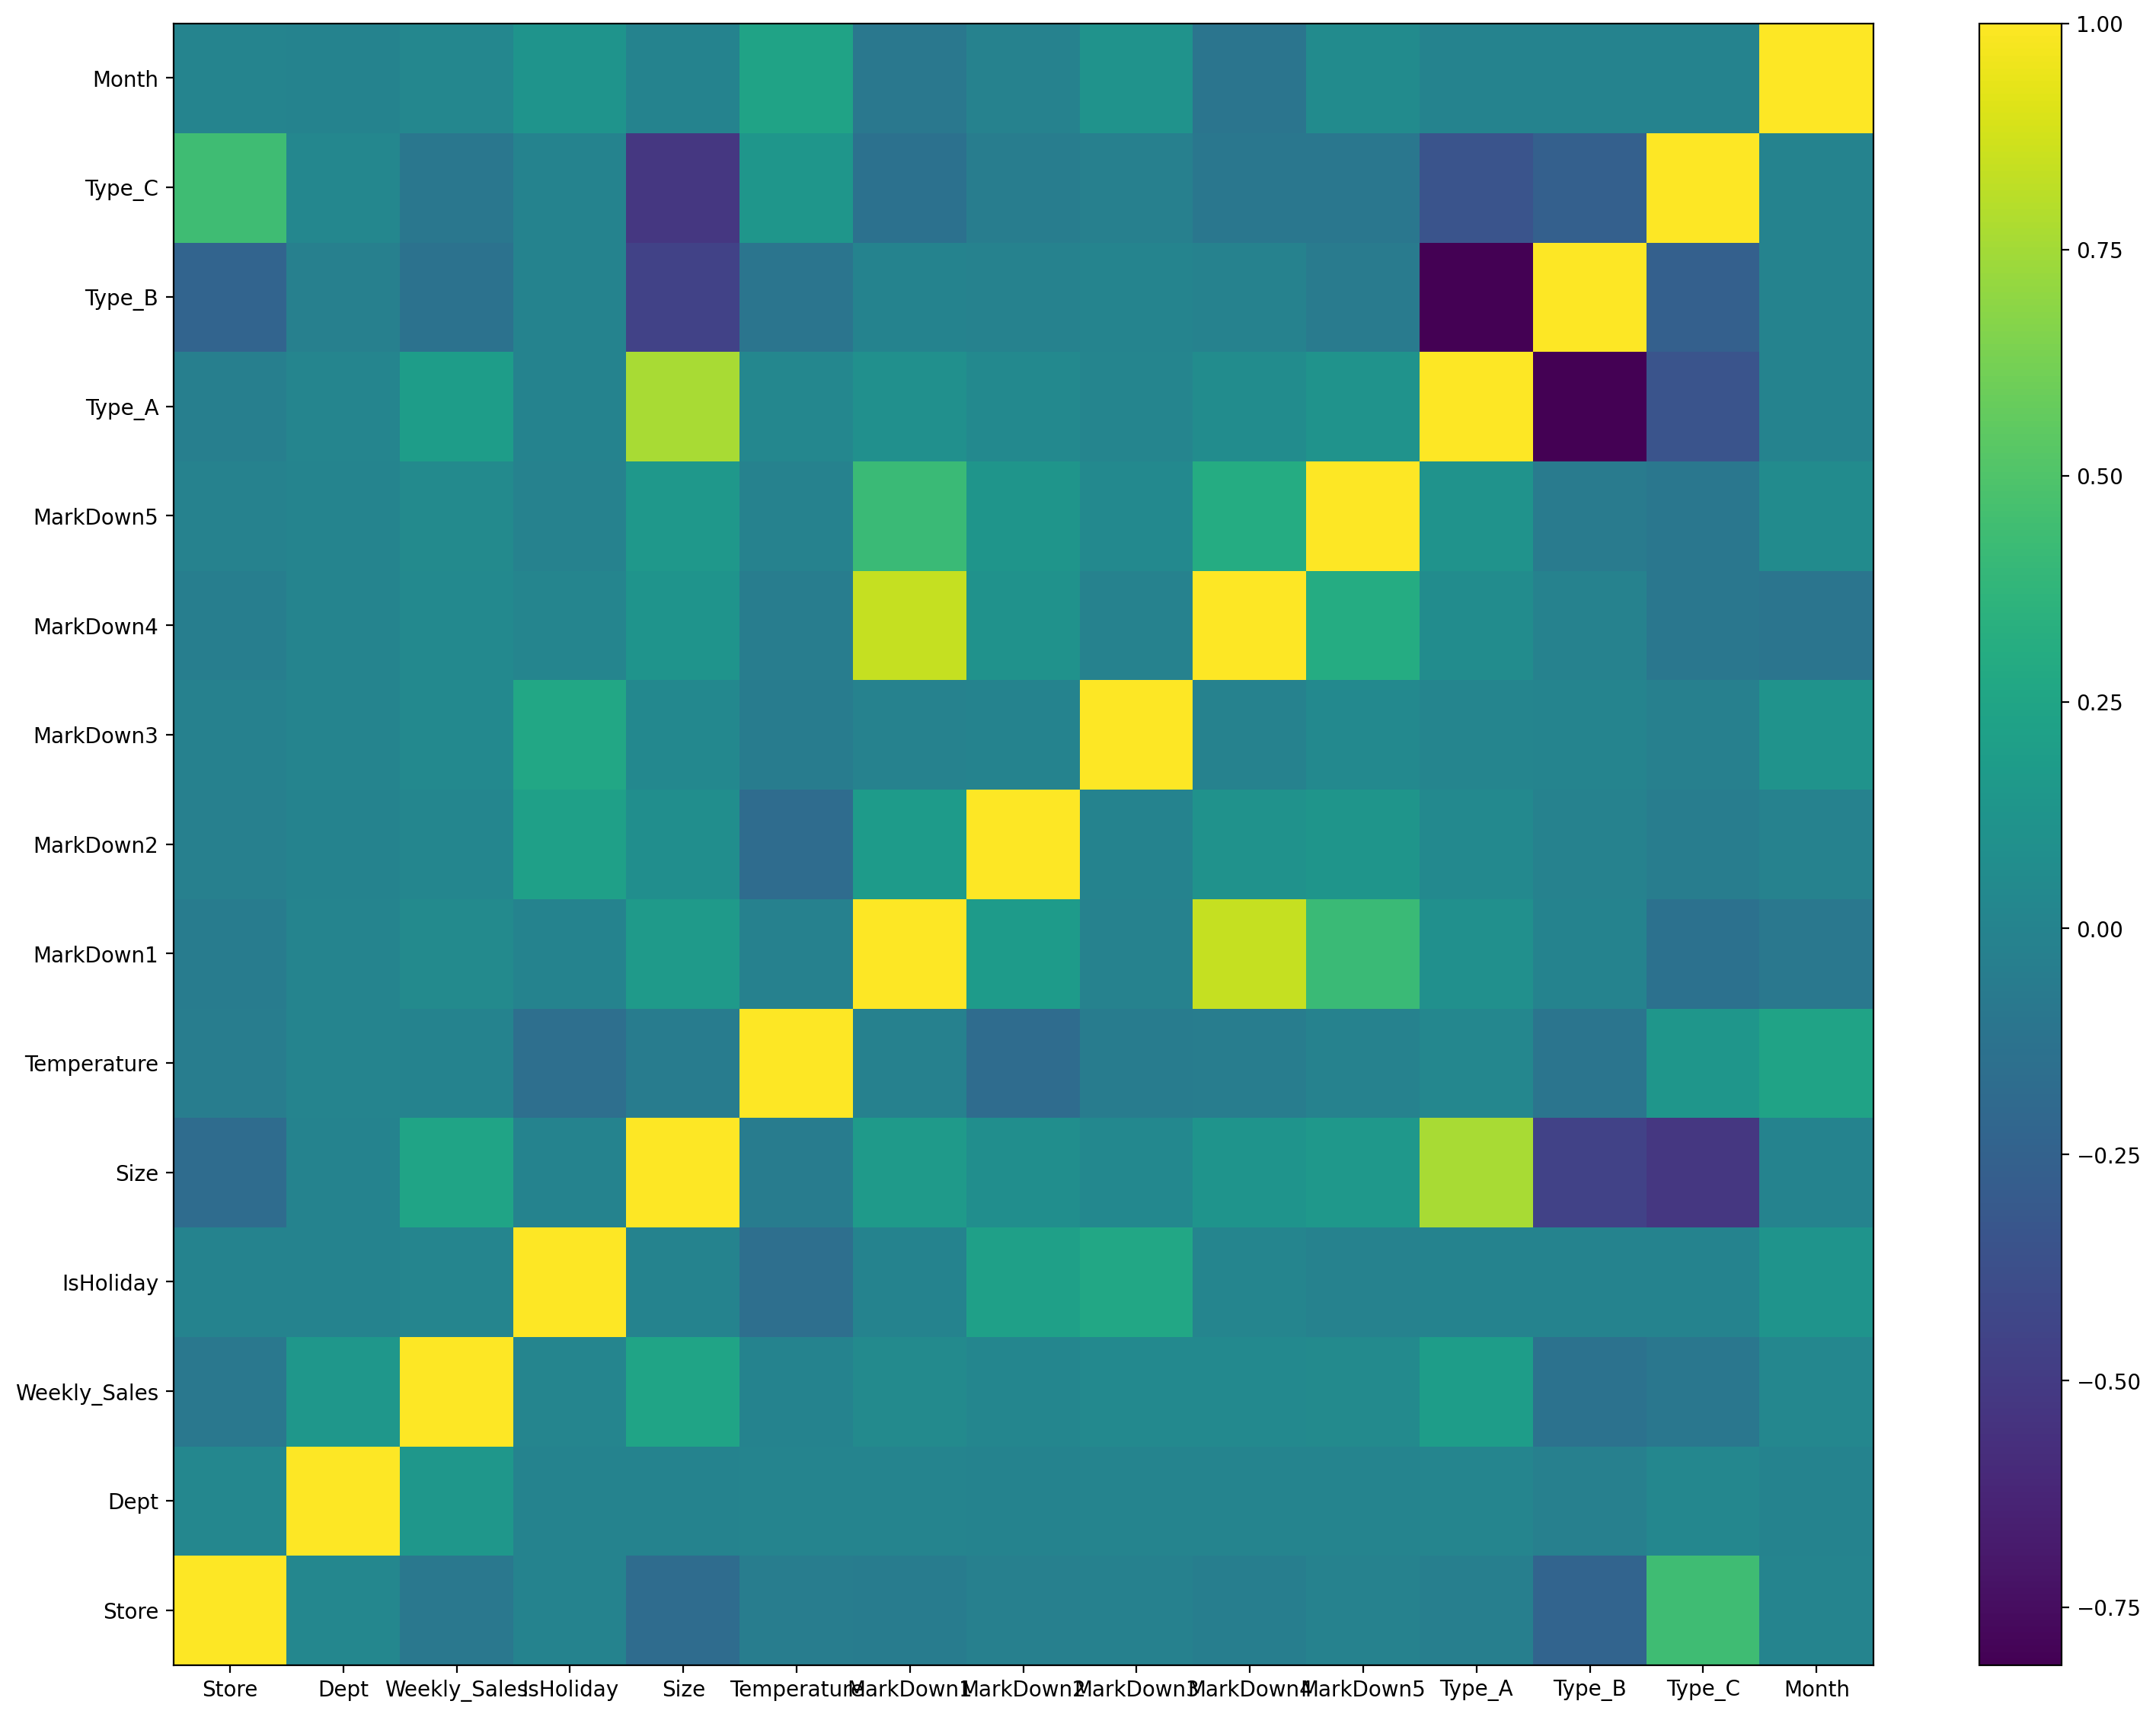

In [105]:
fig = plt.figure(figsize=(18, 14))
corr = dataset.corr()
c = plt.pcolor(corr)
plt.yticks(np.arange(0.5, len(corr.index), 1), corr.index)
plt.xticks(np.arange(0.5, len(corr.columns), 1), corr.columns)
fig.colorbar(c)

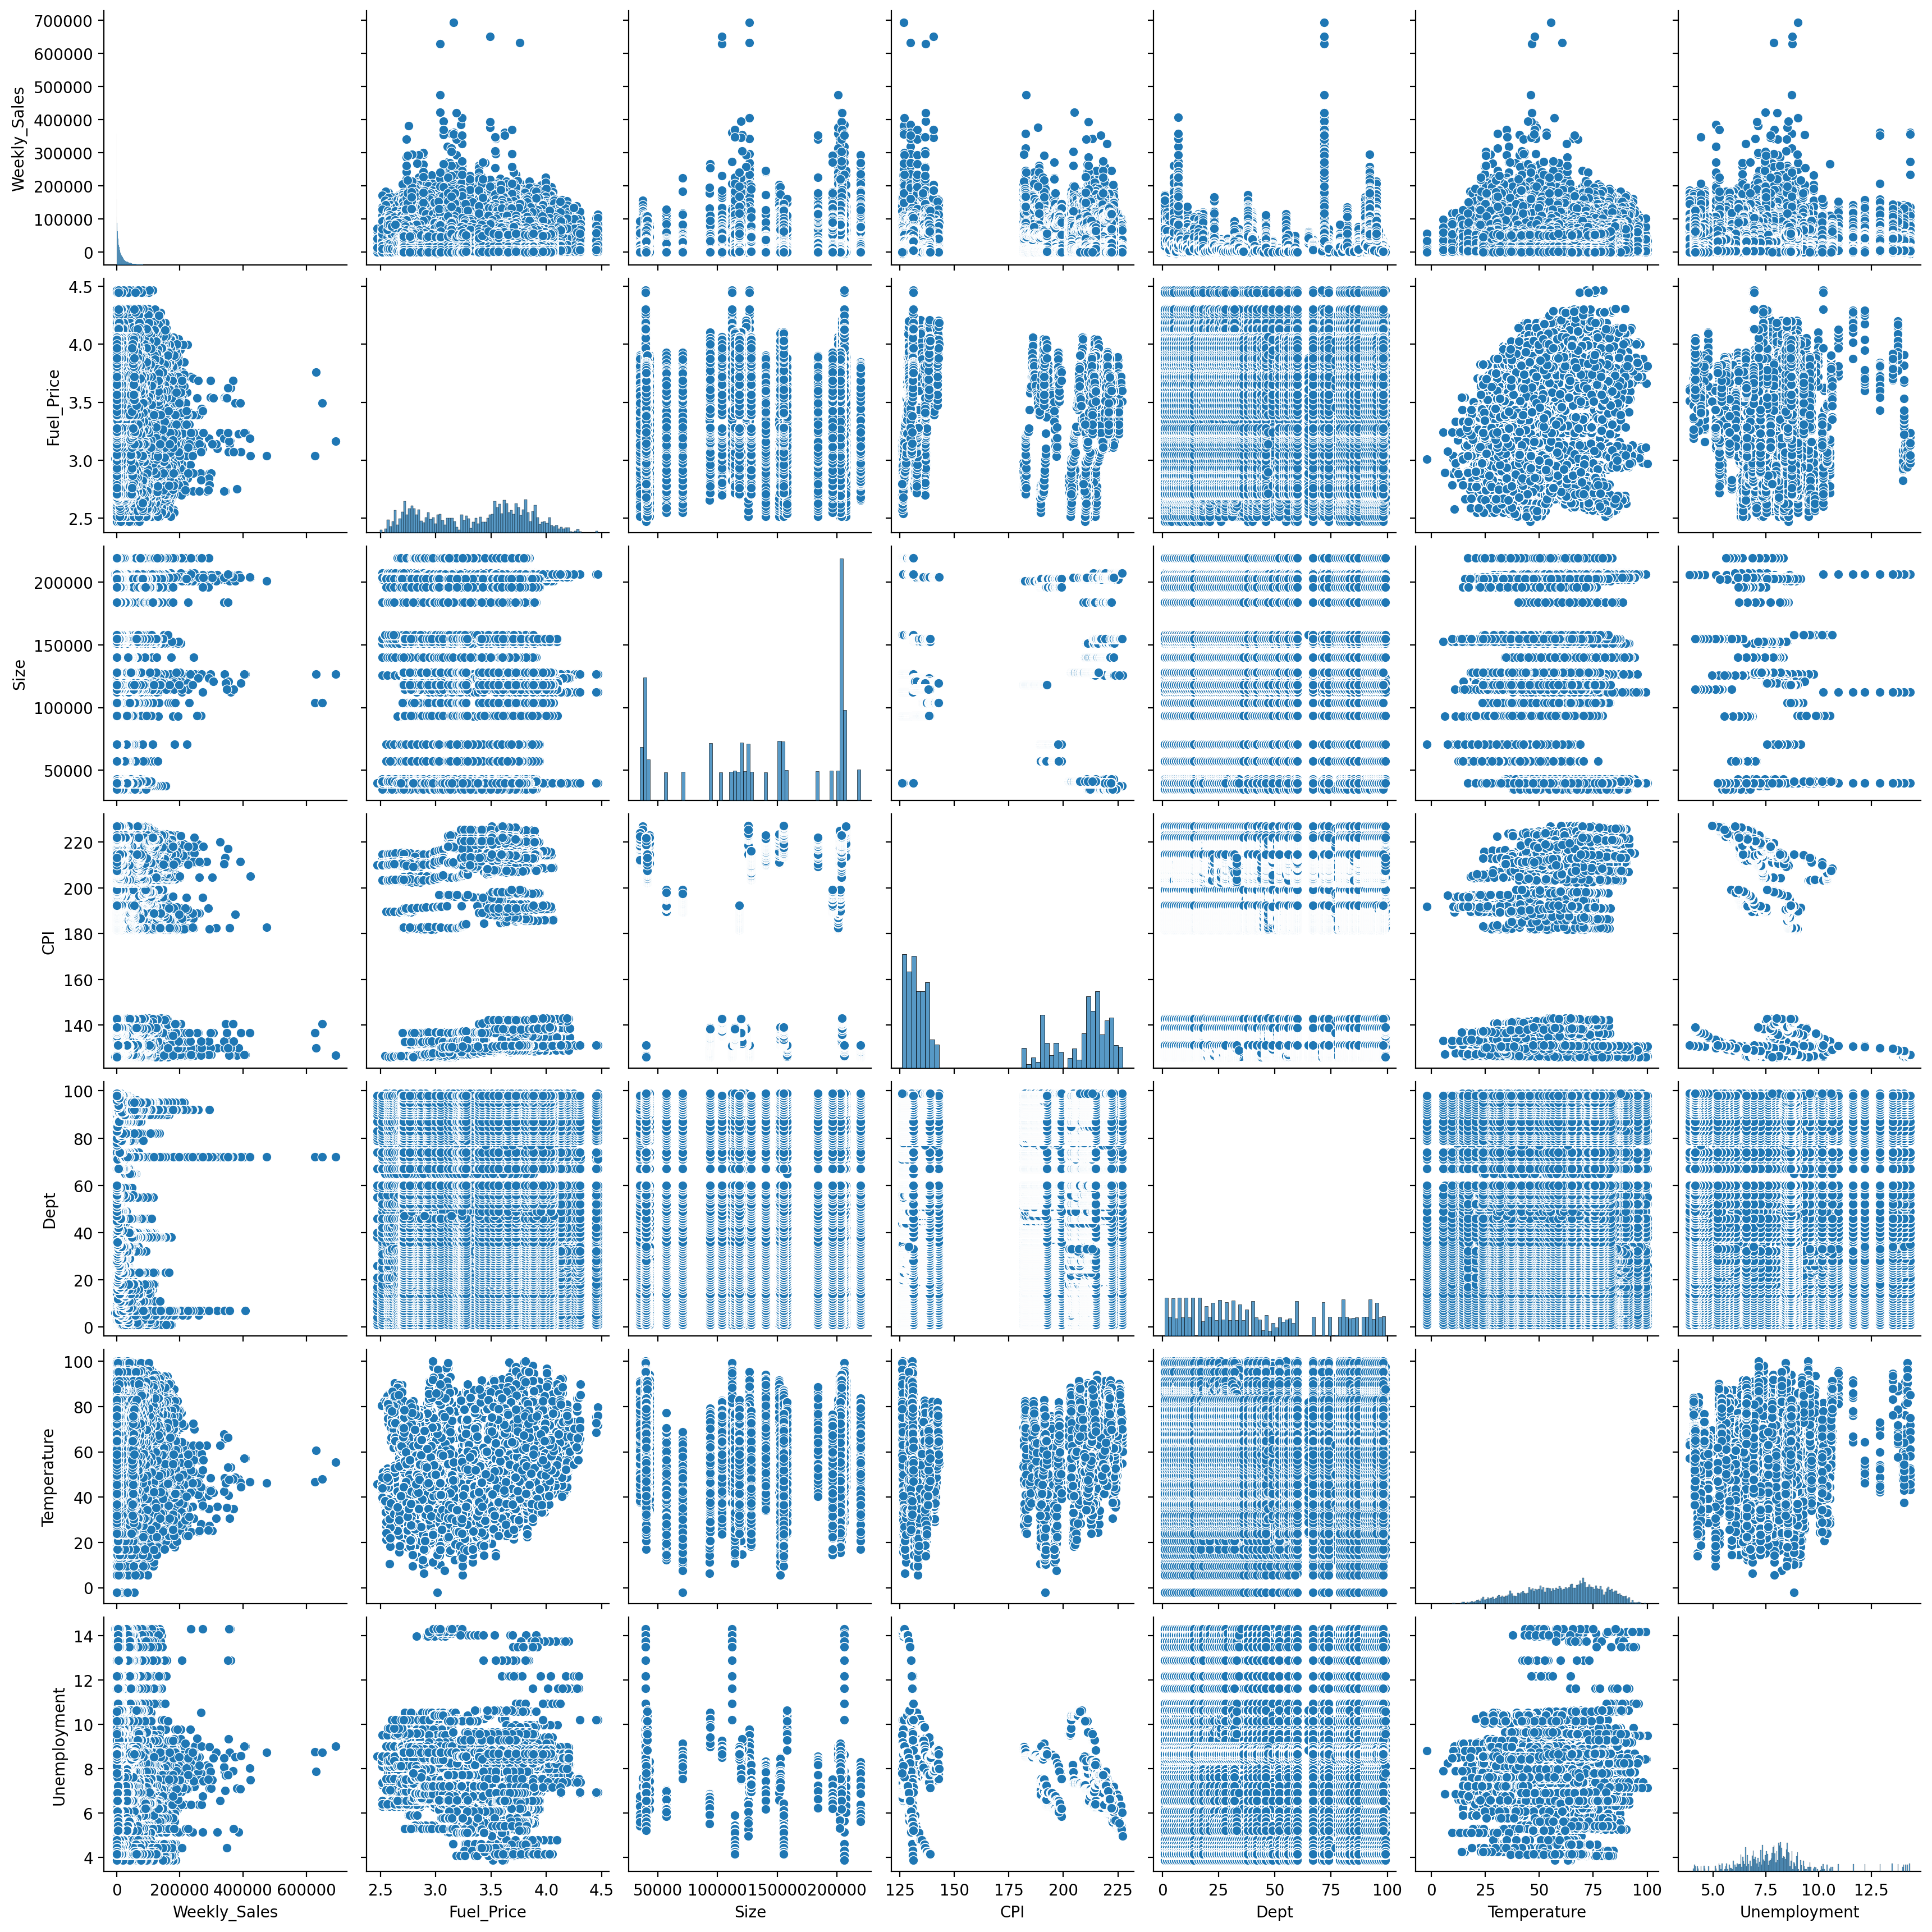

In [39]:
sns.pairplot(dataset, vars=['Weekly_Sales', 'Fuel_Price', 'Size', 'CPI', 'Dept', 'Temperature', 'Unemployment'])

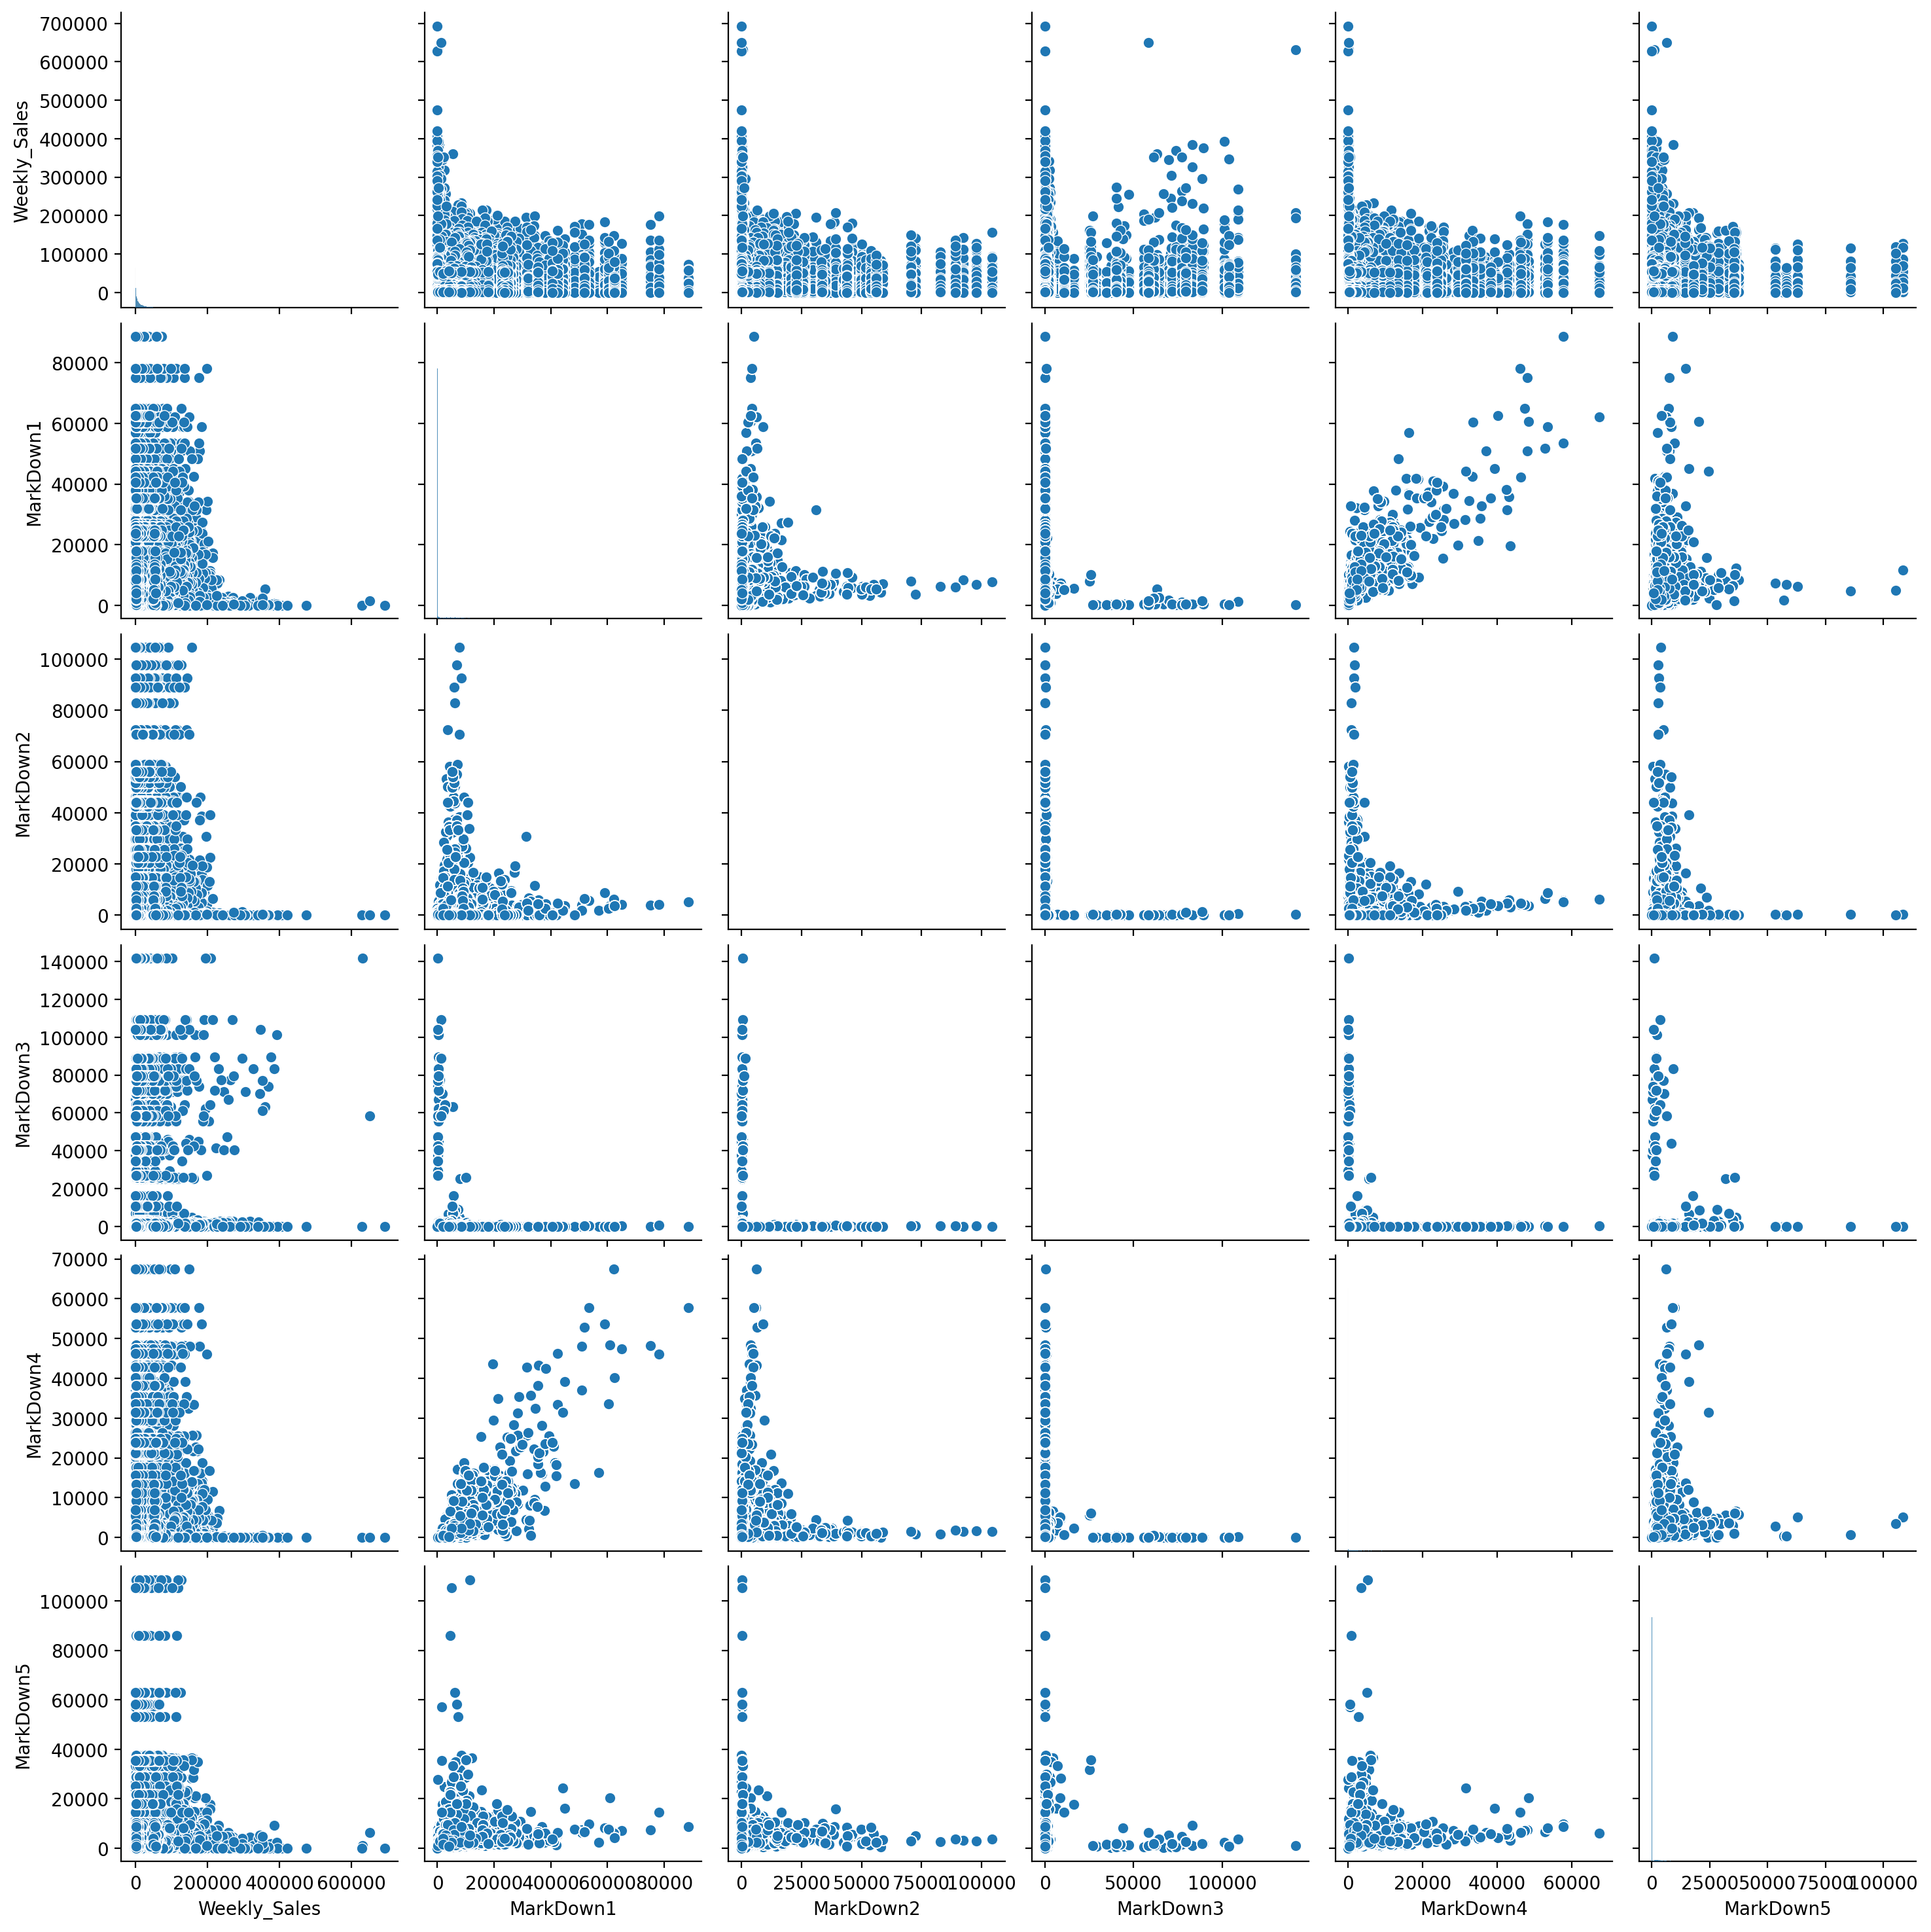

In [40]:
sns.pairplot(dataset.fillna(0), vars=['Weekly_Sales', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'])

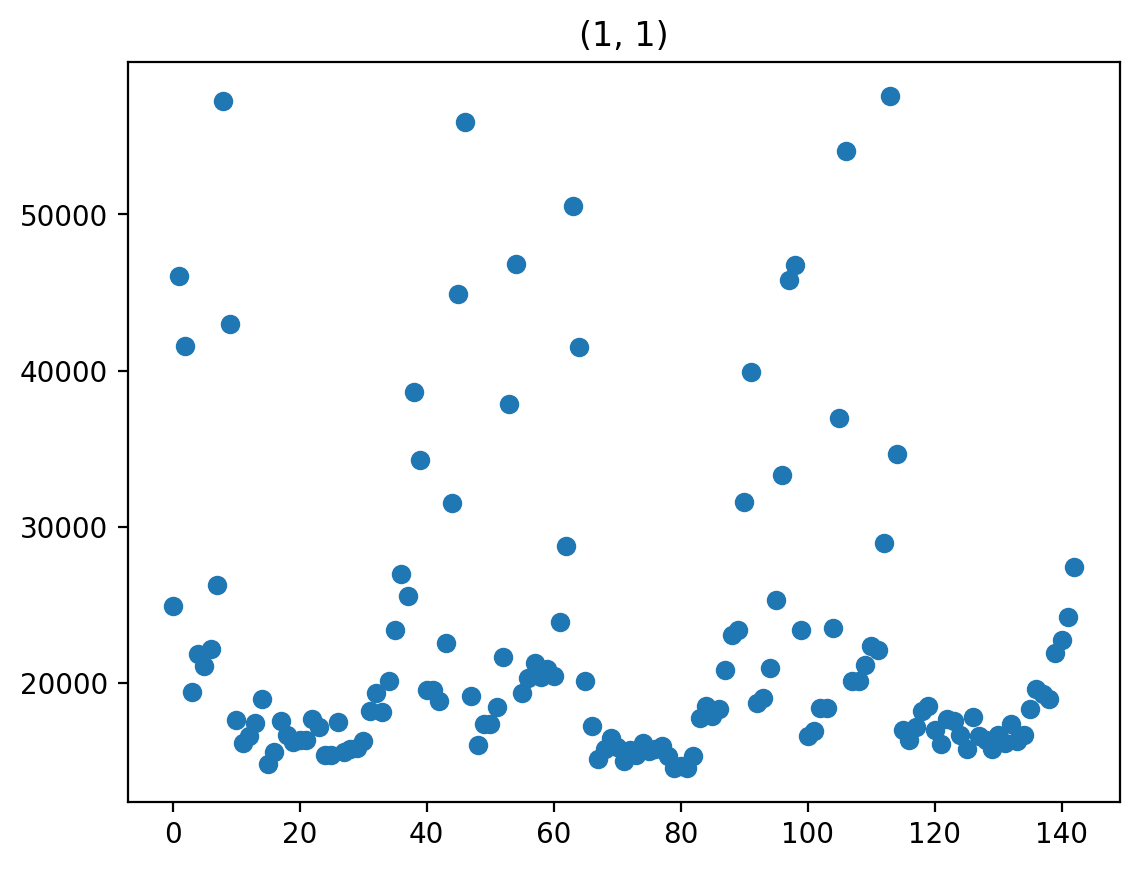

In [41]:
for name, group in dataset.groupby(['Store','Dept']):
  plt.title(name)
  plt.scatter(range(len(group)), group['Weekly_Sales'])
  plt.show()
  break

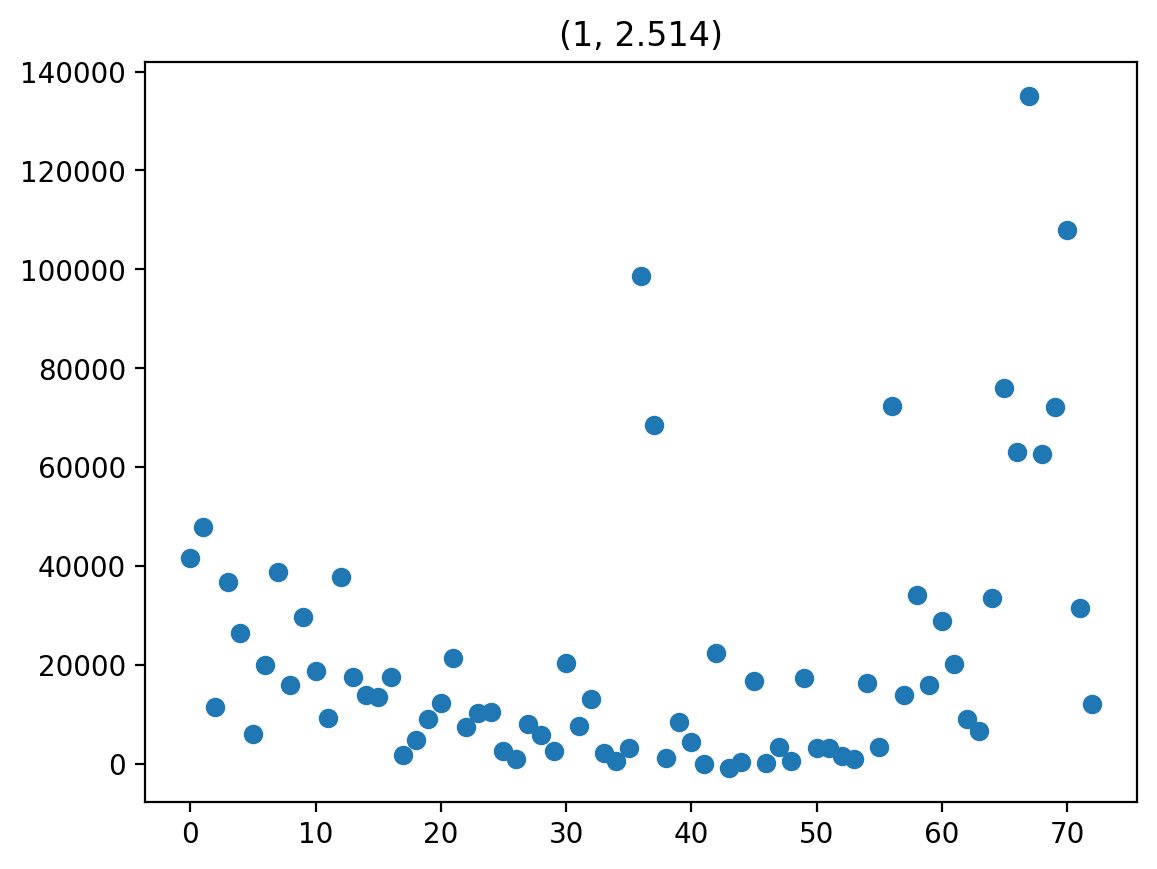

In [42]:
for name, group in dataset.groupby(['Store','Fuel_Price']):
  plt.title(name)
  plt.scatter(range(len(group)), group['Weekly_Sales'])
  plt.show()
  break

In [43]:
dataset.dtypes

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
Type             object
Size              int64
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
dtype: object

In [44]:
dataset.head()

Store  Dept        Date  Weekly_Sales  IsHoliday Type    Size  Temperature  \
0      1     1  2010-02-05      24924.50      False    A  151315        42.31   
1      1     1  2010-02-12      46039.49       True    A  151315        38.51   
2      1     1  2010-02-19      41595.55      False    A  151315        39.93   
3      1     1  2010-02-26      19403.54      False    A  151315        46.63   
4      1     1  2010-03-05      21827.90      False    A  151315        46.50   

   Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
0       2.572        NaN        NaN        NaN        NaN        NaN   
1       2.548        NaN        NaN        NaN        NaN        NaN   
2       2.514        NaN        NaN        NaN        NaN        NaN   
3       2.561        NaN        NaN        NaN        NaN        NaN   
4       2.625        NaN        NaN        NaN        NaN        NaN   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

In [95]:
# Creating a functions for algorithm
def knn():
  knn = KNeighborsRegressor(n_neighbors=15)
  return knn

def randomforestregressor():
  rfr = RandomForestRegressor(n_estimators=100, max_features='auto',verbose=True, n_jobs=5)
  return rfr

def svm():
  svm = SVC(kernel='rbf', gamma='auto')
  return svm

def mlp():
  mlp = MLPRegressor(hidden_layer_sizes=(20,), activation='relu',verbose=True)
  return mlp

def xgboost():
  xgboost = XGBClassifier(loss='log_loss', learning_rate = 0.1, n_estimators=100, verbose=True)
  return xgboost

def extraTreesRegressor():
    etr = ExtraTreesRegressor(n_estimators=100,max_features='log2', verbose=1, n_jobs=1)
    return etr

def model_():
  return extraTreesRegressor()

def train_(train_x, train_y):
  m = model_()
  m.fit(train_x, train_y)
  return m

def predict_(m, test_x):
  return pd.Series(m.predict(test_x))

def train_and_predict(train_x, train_y, test_x):
  m = train_(train_x, train_y)
  return predict_(m, test_x), m

In [47]:
def calculate_error(test_y, predicted, weights):
  return mean_absolute_error(test_y, predicted, sample_weight=weights)

In [52]:
# K Fold Cross Validation
kf = KFold(n_splits=5)
splited = []
for name, group in dataset.groupby(['Store','Dept']):
  group = group.reset_index(drop=True)
  train_x = []
  train_y = []
  tests_x = []
  tests_y = []
  if group.shape[0] <=5:
    f = np.array(range(5))
    np.random.shuffle(f)
    group['fold'] = f[:group.shape[0]]
    continue
  fold = 0
  for train_index, test_index in kf.split(group):
    group.loc[test_index, 'fold'] = fold
    fold += 1
  splited.append(group)

splited = pd.concat(splited).reset_index(drop=True)


In [68]:
splited.head()

Store  Dept  Weekly_Sales  IsHoliday    Size  Temperature  MarkDown1  \
0      1     1      24924.50      False  151315        42.31        0.0   
1      1     1      46039.49       True  151315        38.51        0.0   
2      1     1      41595.55      False  151315        39.93        0.0   
3      1     1      19403.54      False  151315        46.63        0.0   
4      1     1      21827.90      False  151315        46.50        0.0   

   MarkDown2  MarkDown3  MarkDown4  MarkDown5  Type_A  Type_B  Type_C  Month  \
0        0.0        0.0        0.0        0.0    True   False   False      2   
1        0.0        0.0        0.0        0.0    True   False   False      2   
2        0.0        0.0        0.0        0.0    True   False   False      2   
3        0.0        0.0        0.0        0.0    True   False   False      2   
4        0.0        0.0        0.0        0.0    True   False   False      3   

   fold  
0   0.0  
1   0.0  
2   0.0  
3   0.0  
4   0.0

In [96]:
best_model = None
error_cv = 0
best_error = np.iinfo(np.int32).max
for fold in range(5):
    dataset_train = splited.loc[splited['fold'] != fold]
    dataset_test = splited.loc[splited['fold'] == fold]
    train_y = dataset_train['Weekly_Sales']
    train_x = dataset_train.drop(columns=['Weekly_Sales', 'fold'])
    test_y = dataset_test['Weekly_Sales']
    test_x = dataset_test.drop(columns=['Weekly_Sales', 'fold'])
    print(dataset_train.shape, dataset_test.shape)
    predicted, model = train_and_predict(train_x, train_y, test_x)
    weights = test_x['IsHoliday'].replace(True, 5).replace(False, 1)
    error = calculate_error(test_y, predicted, weights)
    error_cv += error
    print(fold, error)
    if error < best_error:
        print('Find best model')
        best_error = error
        best_model = model
error_cv /= 5

(335722, 16) (85552, 16)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.5s finished


0 2498.1442026238974
Find best model
(335849, 16) (85425, 16)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


1 4862.430892349675
(335970, 16) (85304, 16)


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.4s finished


2 2988.455556013103
(338733, 16) (82541, 16)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.0s finished


3 9811.3682667518
(338822, 16) (82452, 16)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.1s finished


4 5784.832024903697


In [100]:
error_cv

5189.046188528434

In [101]:
best_error

2498.1442026238974

In [97]:
# Testing the Dataset

dataset_test = pd.read_csv(r"C:\Users\udayr\Documents\walmart-recruiting-store-sales-forecasting\train.csv\train.csv", names=['Store','Dept','Date','isHoliday'],sep=',', header=0)
features = pd.read_csv(r"C:\Users\udayr\Documents\walmart-recruiting-store-sales-forecasting\features.csv\features.csv",sep=',', header=0,names=['Store','Date','Temperature','Fuel_Price','MarkDown1','MarkDown2','MarkDown3','MarkDown4',
                                                                                                                                                        'MarkDown5','CPI','Unemployment','IsHoliday']).drop(columns=['IsHoliday'])
stores = pd.read_csv(r"C:\Users\udayr\Documents\walmart-recruiting-store-sales-forecasting\stores.csv", names=['Store','Type','Size'],sep=',', header=0)
dataset_test = dataset.merge(stores, how='left').merge(features, how = 'left')

In [98]:
dataset_test = pd.get_dummies(dataset_test, columns=["Type"])
dataset_test[['MarkDown1','MarkDown2','MarkDown3','MarkDown4', 'MarkDown5']] = dataset_test[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].fillna(0)
dataset_test = dataset_test.fillna(0)
column_date = dataset_test['Date']
dataset_test['Month'] = pd.to_datetime(dataset_test['Date']).dt.month
dataset_test = dataset_test.drop(columns=["Date", "CPI", "Fuel_Price", 'Unemployment', 'MarkDown3'])
dataset_test.head()

Store  Dept  Weekly_Sales  IsHoliday    Size  Temperature  MarkDown1  \
0      1     1      24924.50      False  151315        42.31        0.0   
1      1     1      46039.49       True  151315        38.51        0.0   
2      1     1      41595.55      False  151315        39.93        0.0   
3      1     1      19403.54      False  151315        46.63        0.0   
4      1     1      21827.90      False  151315        46.50        0.0   

   MarkDown2  MarkDown4  MarkDown5  Type_A  Type_B  Type_C  Month  Type_A  \
0        0.0        0.0        0.0    True   False   False      1    True   
1        0.0        0.0        0.0    True   False   False      1    True   
2        0.0        0.0        0.0    True   False   False      1    True   
3        0.0        0.0        0.0    True   False   False      1    True   
4        0.0        0.0        0.0    True   False   False      1    True   

   Type_B  Type_C  
0   False   False  
1   False   False  
2   False   False  
3   False   False  
4   False   False